In [1]:
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(42)
X,y = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

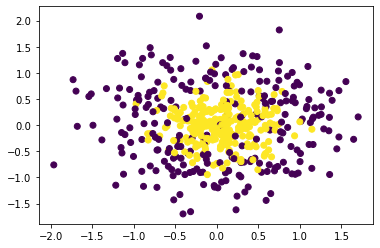

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

ada = AdaBoostClassifier()

np.mean(cross_val_score(ada,X,y,cv=10,scoring='accuracy'))

0.786

In [5]:
ada.fit(X,y)

AdaBoostClassifier()

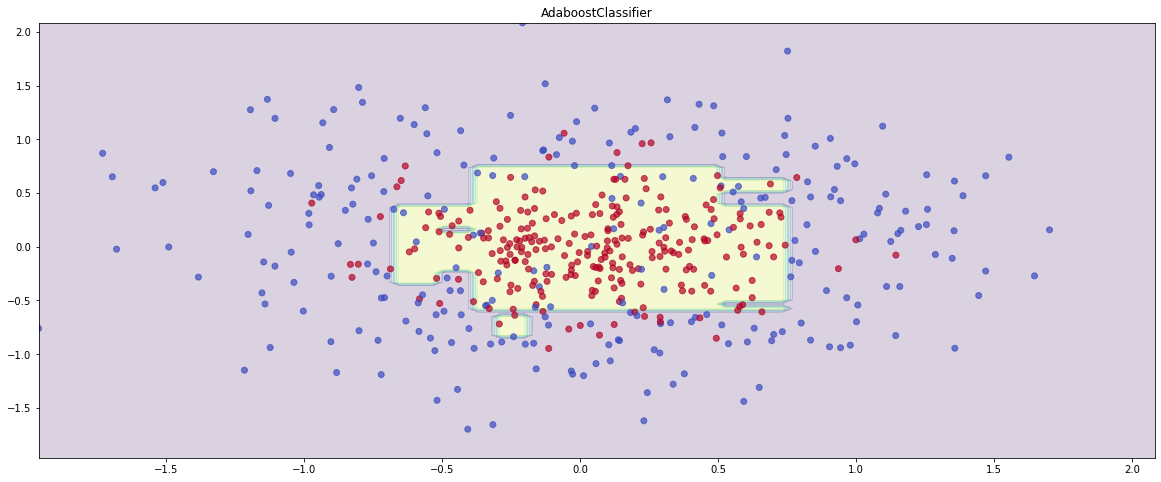

In [6]:
def plot_decision_boundary(ada):
    plt.figure(figsize=(20,8))
    X_range = np.linspace(X.min(),X.max(),100)
    XX,yy = np.meshgrid(X_range,X_range)

    y_hat = ada.predict(np.c_[XX.ravel(),yy.ravel()])
    y_hat = y_hat.reshape(XX.shape)
    plt.contourf(XX,yy,y_hat,alpha=0.2)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=.7)
    plt.title('AdaboostClassifier')
    plt.show()
plot_decision_boundary(ada)

<AxesSubplot:>

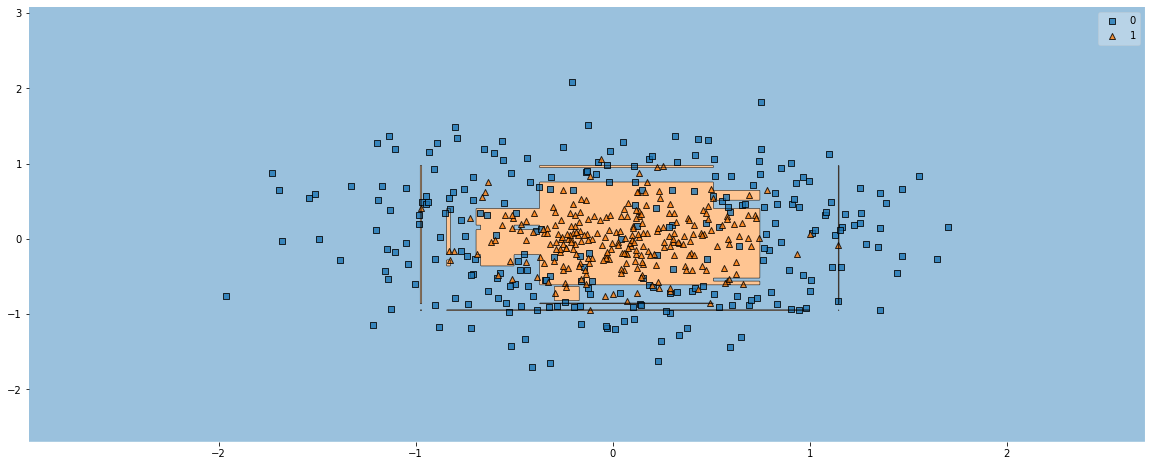

In [7]:
#from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(20,8))
plot_decision_regions(X,y,ada)

<Figure size 1440x576 with 0 Axes>

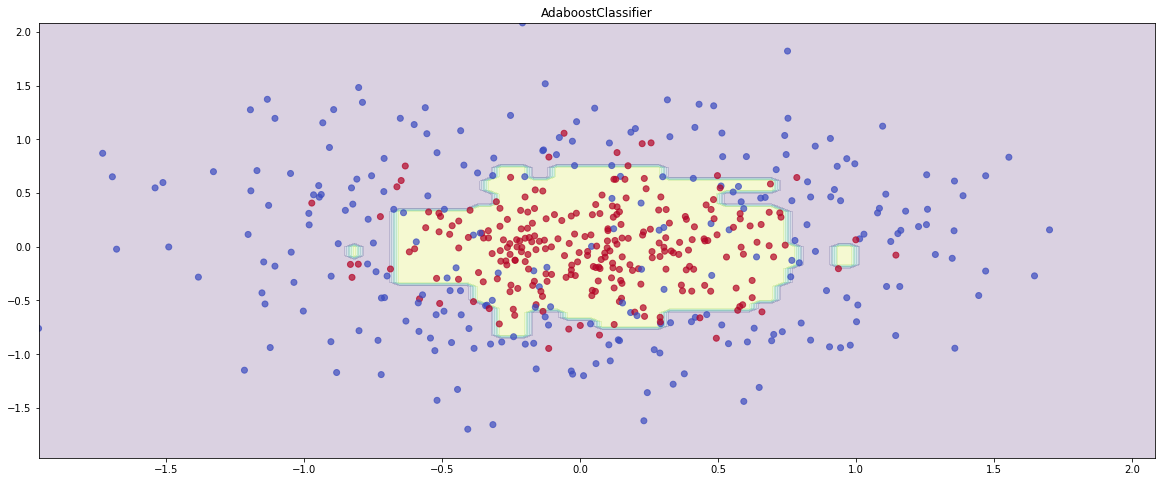

In [8]:
ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.1)
ada.fit(X,y)
plt.figure(figsize=(20,8))
plot_decision_boundary(ada)

<Figure size 1440x576 with 0 Axes>

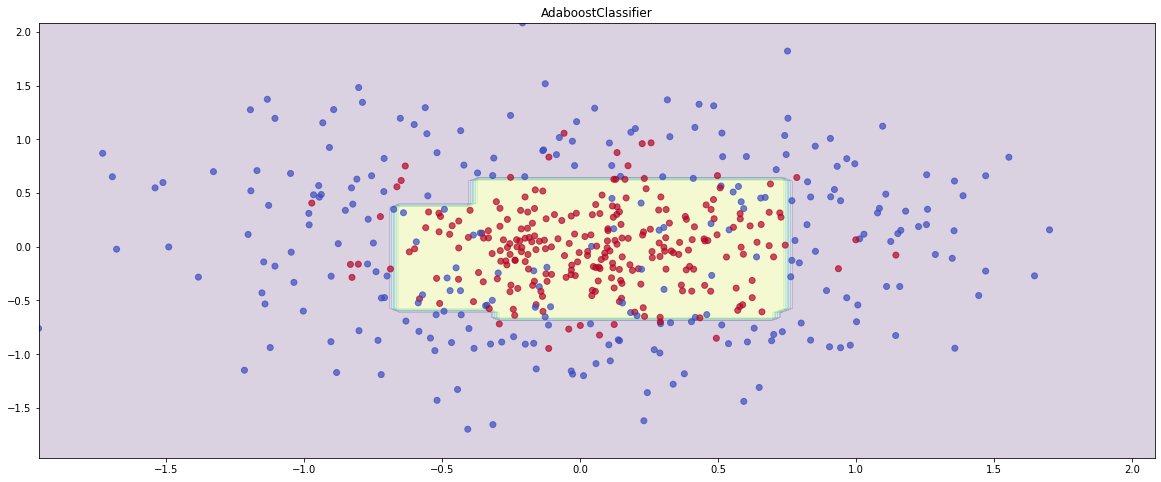

In [9]:
ada = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)
ada.fit(X,y)
plt.figure(figsize=(20,8))
plot_decision_boundary(ada)

#  GridSearchCV

In [10]:
param = {'n_estimators':[10,50,100,500],
        'learning_rate':[0.0001,0.001,0.01,0.1,1.0],
        'algorithm':['SAMME','SAMME.R']}

In [11]:
grid = GridSearchCV(AdaBoostClassifier(),param,cv=10,verbose=1,n_jobs=-1,scoring='accuracy') #The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.
grid.fit(X,y)
model = grid.best_estimator_
y_pred = model.predict(X)
print('Bagging accuracy',accuracy_score(y,y_pred))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Bagging accuracy 0.85


In [12]:
grid.best_score_

0.8320000000000001

In [13]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=500)

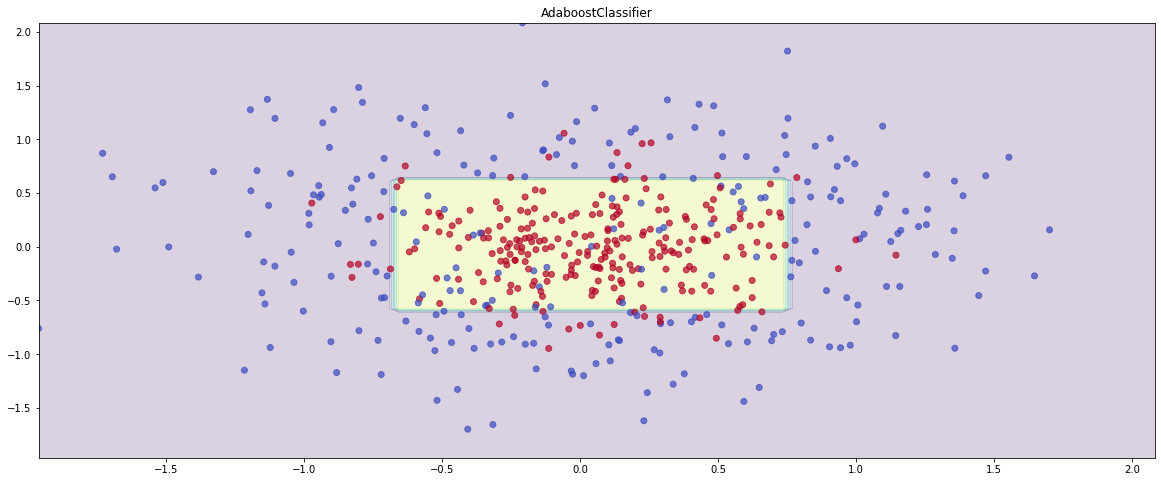

In [17]:
plot_decision_boundary(model)

# RandomizedSearchCV

In [14]:
random = RandomizedSearchCV(AdaBoostClassifier(),param,cv=10,verbose=1,n_jobs=-1,scoring='accuracy') #The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.
random.fit(X,y)
model = random.best_estimator_
y_pred = model.predict(X)
print('Bagging accuracy',accuracy_score(y,y_pred))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Bagging accuracy 0.854


In [15]:
random.best_score_

0.8220000000000001

In [16]:
random.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=100)

In [ ]:
plot_decision_boundary(mod)